In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

https://www.linkedin.com/feed/update/urn:li:activity:7117936296483778560/
https://estadisticas.bcrp.gob.pe/estadisticas/series/diarias/resultados/PD04638PD/html


In [2]:
df = pd.read_csv("Diarias-20240120-155459.csv",header=1) # Tenia encabezado el archivo
df

,Unnamed: 0,Tipo de cambio - TC Interbancario (S/ por US$) - Venta
0,02Ene97,2.618
1,03Ene97,2.62
2,06Ene97,2.629
3,07Ene97,2.635
4,08Ene97,2.635
...,...,...
7051,12Ene24,3.6945
7052,15Ene24,3.698
7053,16Ene24,3.71783333333333
7054,17Ene24,3.74016666666667


In [3]:
df.rename(columns={'Unnamed: 0': 'Fecha'}, inplace=True)

In [4]:
df.rename(columns={'Tipo de cambio - TC Interbancario (S/ por US$) - Venta': 'TipoCambio'}, inplace=True)

In [5]:
df.isna().sum()

Fecha         0
TipoCambio    0
dtype: int64

In [6]:
df

,Fecha,TipoCambio
0,02Ene97,2.618
1,03Ene97,2.62
2,06Ene97,2.629
3,07Ene97,2.635
4,08Ene97,2.635
...,...,...
7051,12Ene24,3.6945
7052,15Ene24,3.698
7053,16Ene24,3.71783333333333
7054,17Ene24,3.74016666666667


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7056 entries, 0 to 7055
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Fecha       7056 non-null   object
 1   TipoCambio  7056 non-null   object
dtypes: object(2)
memory usage: 110.4+ KB


In [8]:
df['TipoCambio'] =pd.to_numeric(df['TipoCambio'],errors="coerce")   

In [16]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7056 entries, 0 to 7055
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Fecha       7056 non-null   object 
 1   TipoCambio  6742 non-null   float64
dtypes: float64(1), object(1)
memory usage: 110.4+ KB
None


In [21]:
#Mostraremos un gráfico del t.c.
y=df["TipoCambio"]

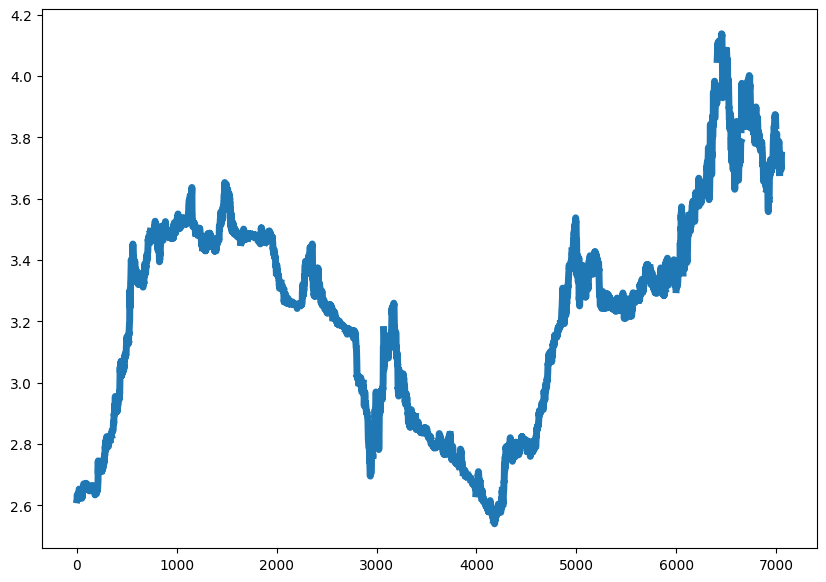

In [27]:
plt.figure(figsize=(10,7))
plt.plot(y,linewidth=5);

In [29]:
#Para trabajar mejor la serie damos formato a la fecha. 1ro. crearemos un diccionario para cambiar los meses y asociar texto a mes 
mes_dict = {
    'Ene' : '01',
    'Feb' : '02',
    'Mar' : '03',
    'Abr' : '04',
    'May' : '05',
    'Jun' : '06',
    'Jul' : '07',
    'Ago' : '08',
    'Set' : '09',
    'Oct' : '10',
    'Nov' : '11',
    'Dic' : '12',    
}

In [31]:
#Remplazando texto por el diccionario creado
df["Fecha"] = df["Fecha"].str.extract(r'(\d+)([A-Za-z]+)(\d+)').apply(lambda x:x[0] + mes_dict[x[1]]+x[2], axis=1)

In [32]:
df

,Fecha,TipoCambio
0,020197,2.618000
1,030197,2.620000
2,060197,2.629000
3,070197,2.635000
4,080197,2.635000
...,...,...
7051,120124,3.694500
7052,150124,3.698000
7053,160124,3.717833
7054,170124,3.740167


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7056 entries, 0 to 7055
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Fecha       7056 non-null   object 
 1   TipoCambio  6742 non-null   float64
dtypes: float64(1), object(1)
memory usage: 110.4+ KB


In [38]:
#Transformando la fila Fecha a formato date
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d%m%y')


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7056 entries, 0 to 7055
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Fecha       7056 non-null   datetime64[ns]
 1   TipoCambio  6742 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 110.4 KB


In [41]:
df

,Fecha,TipoCambio
0,1997-01-02,2.618000
1,1997-01-03,2.620000
2,1997-01-06,2.629000
3,1997-01-07,2.635000
4,1997-01-08,2.635000
...,...,...
7051,2024-01-12,3.694500
7052,2024-01-15,3.698000
7053,2024-01-16,3.717833
7054,2024-01-17,3.740167


In [42]:
#Cambiamos el indice:
df = df.set_index('Fecha')

#data = data.set_index('nombre_columna')

In [43]:
df

,TipoCambio
Fecha,
1997-01-02,2.618000
1997-01-03,2.620000
1997-01-06,2.629000
1997-01-07,2.635000
1997-01-08,2.635000
...,...
2024-01-12,3.694500
2024-01-15,3.698000
2024-01-16,3.717833


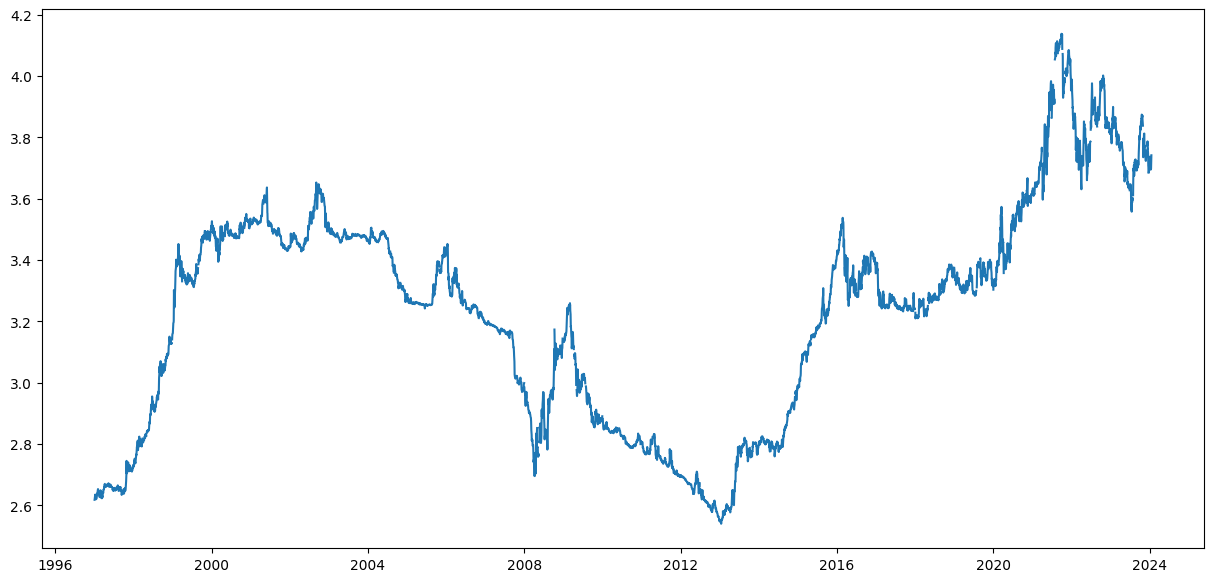

In [49]:
#Visualización Premiliminar:
plt.figure(figsize=(15,7))
plt.plot(df.index,df['TipoCambio']);